In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
url = 'https://raw.githubusercontent.com/Chandrakant817/Stroke-Prediction/main/Stroke_Prediction/healthcare-dataset-stroke-data.csv'
data = pd.read_csv(url)

In [3]:
print(data.head())

# Check for nulls
print(data.isnull().sum())

# Fill missing BMI values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

# Drop id column
data.drop('id', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    data[col] = le.fit_transform(data[col])

# Feature and Target split
X = data.drop('stroke', axis=1)
y = data['stroke']

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
id                     0
gender                 0
age   

<ipython-input-3-cdc74efcf851>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.9510763209393346


In [6]:
# 2. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9148727984344422


In [7]:
# 3. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.949119373776908


In [8]:

# 4. Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9481409001956947


In [9]:
# 5. ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate ANN
ann_loss, ann_acc = model.evaluate(X_test, y_test)
print("ANN Test Accuracy:", ann_acc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8101 - loss: 0.4627 - val_accuracy: 0.9425 - val_loss: 0.2150
Epoch 2/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9556 - loss: 0.1814 - val_accuracy: 0.9425 - val_loss: 0.1846
Epoch 3/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9519 - loss: 0.1710 - val_accuracy: 0.9425 - val_loss: 0.1839
Epoch 4/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9492 - loss: 0.1841 - val_accuracy: 0.9425 - val_loss: 0.1806
Epoch 5/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9559 - loss: 0.1596 - val_accuracy: 0.9425 - val_loss: 0.1775
Epoch 6/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9472 - loss: 0.1817 - val_accuracy: 0.9425 - val_loss: 0.1788
Epoch 7/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9559 - loss: 0.1489 - val_accuracy: 0.9425 - val_loss: 0.1773
Epoch 8/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9540 - loss: 0.1471 - val_accuracy:

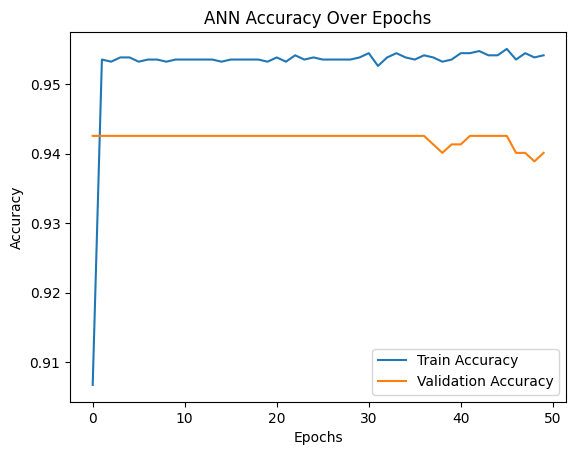

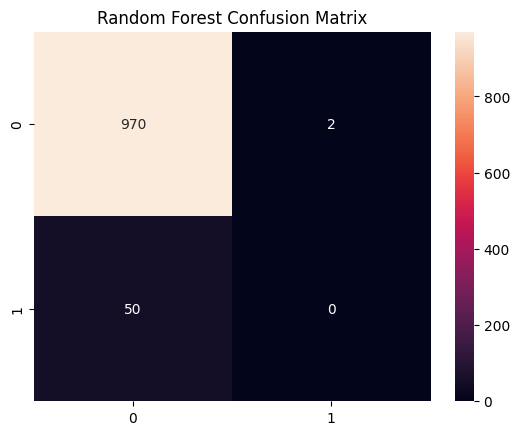

In [10]:


# Plot ANN training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Confusion Matrix Example
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.show()

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.98      0.51      0.51      1022
weighted avg       0.95      0.95      0.93      1022

Confusion Matrix:
 [[972   0]
 [ 49   1]]
Accuracy Score: 0.952054794520548


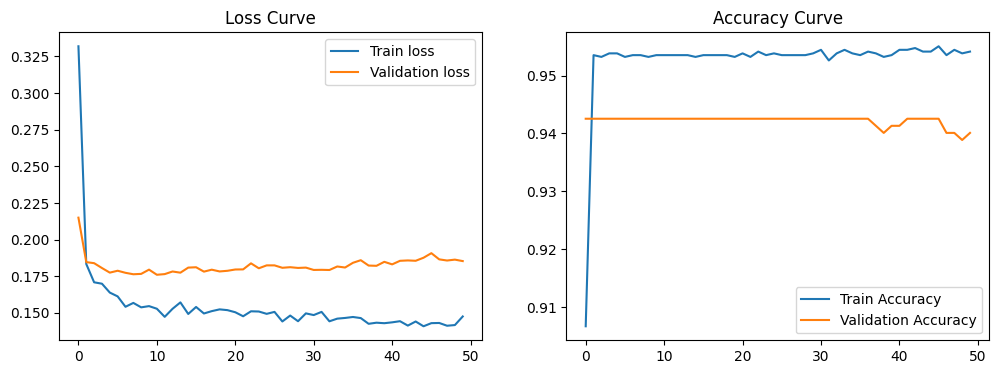

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot loss and accuracy
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()